In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data=pd.read_excel('Cluster_Data_HDBSCAN.xlsx',sheet_name=11,header=None)
data.shape

(339, 43)

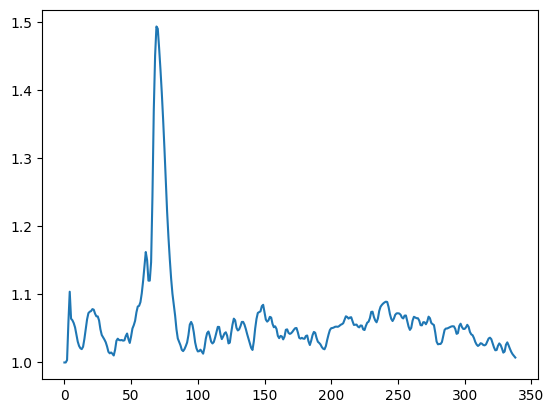

In [ ]:
col=20
col_data=data.iloc[:,col]
col_data.index=[i for i in range(0,len(col_data))]
col_data.plot()
col_data=np.array(col_data)

In [ ]:
def split_sequence(sequence, window_size):
    X = []
    y = []
    for i in range(len(sequence)):
        end_idx = i + window_size
        if end_idx > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
train=col_data[:-int(len(col_data)*0.2)]
test=col_data[-int(len(col_data)*0.2):]
x_train,y_train=split_sequence(train,window_size=3)
x_test,y_test=split_sequence(test,window_size=3)

In [ ]:
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5360.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          8.24e-237
Time:                        09:31:35   Log-Likelihood:                 874.29
No. Observations:                 269   AIC:                            -1741.
Df Residuals:                     265   BIC:                            -1726.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.009      3.345      0.0

In [ ]:
x_test=sm.add_constant(x_test)
y_pred=result.predict(x_test)

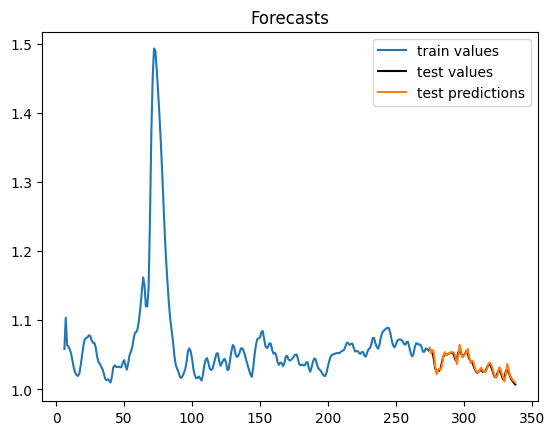

In [ ]:
plt.plot(pd.Series(y_train,index=[i for i in range(6,275)]), label='train values')
plt.plot(pd.Series(y_test,index=[i for i in range(275,339)]), label='test values',color='black')
plt.plot(pd.Series(y_pred,index=[i for i in range(275,339)]), label='test predictions')
plt.title('Forecasts')
plt.legend()

In [ ]:
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
print(f'rmse: {rmse}')

rmse: 0.0035788648131074153


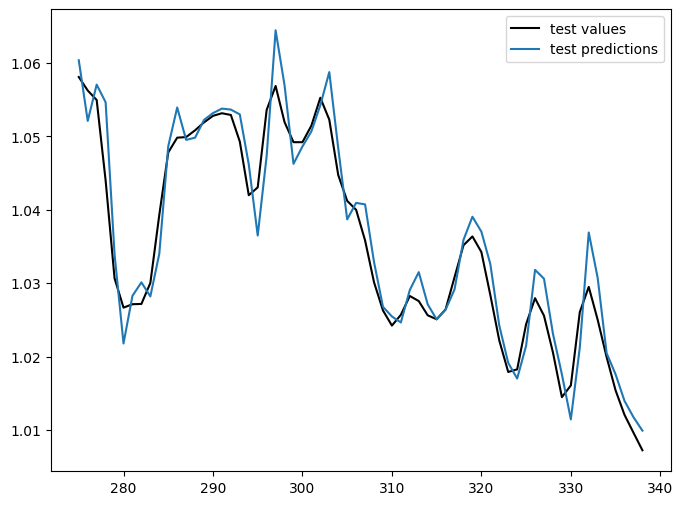

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(pd.Series(y_test,index=[i for i in range(275,339)]), label='test values',color='black')
plt.plot(pd.Series(y_pred,index=[i for i in range(275,339)]), label='test predictions')
plt.legend()

In [ ]:
new_data = np.array([col_data[336],col_data[337],col_data[338]])
ones_col = np.ones((1, 1))
new_data = np.concatenate((ones_col,new_data.reshape(1,-1)),axis=1)
forecast= result.predict(new_data)

In [ ]:
print(f'Predicted future value: {forecast[0]}')

Predicted future value: 1.007308735562443
